## 20192704유수안 

In [1]:
!pip install haversine

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib
import matplotlib.pyplot as plt
import os
from IPython.display import set_matplotlib_formats
import json
%matplotlib inline 

#각 지점간의 거리 구하기 위한 모듈
from haversine import haversine

In [3]:
shop_2021=pd.read_csv(os.getcwd()+'/소상공인시장진흥공단_상가(상권)정보_서울_202103.csv', encoding='UTF-8')

## 파리바게트_횡단보도_입지관계

In [4]:
#파리바게트 데이터
df_paris=shop_2021[shop_2021['상호명'].str.contains('파리바게트|빠리바게트|파리바게뜨|빠리바게뜨',na=False)]
df_paris=df_paris[['상호명','경도','위도','시군구명','도로명주소']]
df_paris['브랜드명']='파리바게트'
#중복제거
df_paris=df_paris.drop_duplicates(['도로명주소'])
df_paris

상호명          경도         위도  시군구명                  도로명주소  \
2361    파리바게뜨카페하월곡동일점  127.033026  37.607805   성북구      서울특별시 성북구 종암로 196   
3221            파리바게뜨  126.929604  37.489471   관악구    서울특별시 관악구 보라매로2길 34   
3412      파리바게뜨종로세무서점  126.988573  37.574211   종로구   서울특별시 종로구 삼일대로30길 21   
3519       파리바게뜨여의경도점  126.931485  37.519330  영등포구   서울특별시 영등포구 여의대방로 383   
3636        가락중앙파리바게뜨  127.147707  37.539723   강동구  서울특별시 강동구 천호대로197길 84   
...               ...         ...        ...   ...                    ...   
311972          파리바게뜨  126.838176  37.529902   양천구      서울특별시 양천구 곰달래로 46   
312608     파리바게뜨가락중앙점  127.131055  37.495386   송파구      서울특별시 송파구 동남로 202   
313075          파리바게뜨  127.041853  37.659516   도봉구      서울특별시 도봉구 도봉로 618   
313078          파리바게뜨  127.012439  37.566376    중구     서울특별시 중구 을지로45길 46   
314920          파리바게뜨  126.972540  37.557151    중구        서울특별시 중구 세종대로 2   

         브랜드명  
2361    파리바게트  
3221    파리바게트  
3412    파리바게트  
3519    파리바게트  
3636    파리바게트  
...       ...  
311972  파리바게트  
312608  파리바게트  
313075  파리바게트  
313078  파리바게트  
314920  파리바게트  

[391 rows x 6 columns]

In [5]:
#횡단보도 데이터
crosswalk = pd.read_csv(os.getcwd()+'/서울시 횡단보도 위치정보 (좌표계_ WGS1984).csv', encoding = 'cp949')
crosswalk=crosswalk[['위도','경도']]
crosswalk['종류']='횡단보도'
crosswalk

위도          경도    종류
0      37.631108  126.927777  횡단보도
1      37.578073  126.927166  횡단보도
2      37.577637  126.927554  횡단보도
3      37.577401  126.927198  횡단보도
4      37.577929  126.928199  횡단보도
...          ...         ...   ...
32128  37.572416  126.960425  횡단보도
32129  37.497020  127.132705  횡단보도
32130  37.538999  126.832815  횡단보도
32131  37.493355  127.013576  횡단보도
32132  37.485118  126.871245  횡단보도

[32133 rows x 3 columns]

In [6]:
#null 확인
crosswalk.isnull().sum()

위도    0
경도    0
종류    0
dtype: int64

In [7]:
#두개의 데이터프레임 합치기
df1_concat=pd.concat([df_paris,crosswalk],ignore_index=True)
df1_concat

상호명          경도         위도  시군구명                  도로명주소  \
0      파리바게뜨카페하월곡동일점  127.033026  37.607805   성북구      서울특별시 성북구 종암로 196   
1              파리바게뜨  126.929604  37.489471   관악구    서울특별시 관악구 보라매로2길 34   
2        파리바게뜨종로세무서점  126.988573  37.574211   종로구   서울특별시 종로구 삼일대로30길 21   
3         파리바게뜨여의경도점  126.931485  37.519330  영등포구   서울특별시 영등포구 여의대방로 383   
4          가락중앙파리바게뜨  127.147707  37.539723   강동구  서울특별시 강동구 천호대로197길 84   
...              ...         ...        ...   ...                    ...   
32519            NaN  126.960425  37.572416   NaN                    NaN   
32520            NaN  127.132705  37.497020   NaN                    NaN   
32521            NaN  126.832815  37.538999   NaN                    NaN   
32522            NaN  127.013576  37.493355   NaN                    NaN   
32523            NaN  126.871245  37.485118   NaN                    NaN   

        브랜드명    종류  
0      파리바게트   NaN  
1      파리바게트   NaN  
2      파리바게트   NaN  
3      파리바게트   NaN  
4      파리바게트   NaN  
...      ...   ...  
32519    NaN  횡단보도  
32520    NaN  횡단보도  
32521    NaN  횡단보도  
32522    NaN  횡단보도  
32523    NaN  횡단보도  

[32524 rows x 7 columns]

<AxesSubplot:xlabel='경도', ylabel='위도'>

/Users/yoosuean/.pyenv/versions/miniforge3-4.9.2/envs/conda-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yoosuean/.pyenv/versions/miniforge3-4.9.2/envs/conda-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yoosuean/.pyenv/versions/miniforge3-4.9.2/envs/conda-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yoosuean/.pyenv/versions/miniforge3-4.9.2/envs/conda-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yoosuean/.pyenv/versions/miniforge3-4.9.2/envs/conda-env/lib/python3.9/site-packages/matplotlib/backe

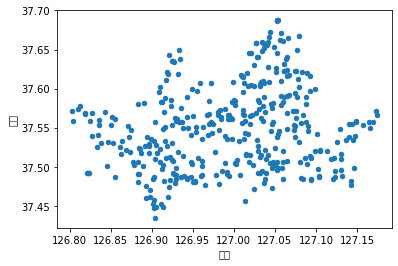

In [8]:
# 파리바게트 산점도 찍어보기
df_paris.plot.scatter(x='경도', y='위도')

In [9]:
# folium으로 지도에 위치 찍기
df_paris=df_paris.reset_index(drop=True)
geo_paris_df = df_paris.copy()
geo_paris_df

상호명          경도         위도  시군구명                  도로명주소   브랜드명
0    파리바게뜨카페하월곡동일점  127.033026  37.607805   성북구      서울특별시 성북구 종암로 196  파리바게트
1            파리바게뜨  126.929604  37.489471   관악구    서울특별시 관악구 보라매로2길 34  파리바게트
2      파리바게뜨종로세무서점  126.988573  37.574211   종로구   서울특별시 종로구 삼일대로30길 21  파리바게트
3       파리바게뜨여의경도점  126.931485  37.519330  영등포구   서울특별시 영등포구 여의대방로 383  파리바게트
4        가락중앙파리바게뜨  127.147707  37.539723   강동구  서울특별시 강동구 천호대로197길 84  파리바게트
..             ...         ...        ...   ...                    ...    ...
386          파리바게뜨  126.838176  37.529902   양천구      서울특별시 양천구 곰달래로 46  파리바게트
387     파리바게뜨가락중앙점  127.131055  37.495386   송파구      서울특별시 송파구 동남로 202  파리바게트
388          파리바게뜨  127.041853  37.659516   도봉구      서울특별시 도봉구 도봉로 618  파리바게트
389          파리바게뜨  127.012439  37.566376    중구     서울특별시 중구 을지로45길 46  파리바게트
390          파리바게뜨  126.972540  37.557151    중구        서울특별시 중구 세종대로 2  파리바게트

[391 rows x 6 columns]

In [10]:
paris_map = folium.Map(location=[geo_paris_df['위도'].mean(), geo_paris_df['경도'].mean()], zoom_start=11, tiles='Stamen Toner')

for n in geo_paris_df.index:
    
    folium.features.CircleMarker(
        location = [geo_paris_df.loc[n,'위도'], geo_paris_df.loc[n,'경도']],
        radius=4,
        popup = geo_paris_df.loc[n, '상호명'] + ' - ' + geo_paris_df.loc[n, '도로명주소'],
        color = "blue",
        fill = True,
        fill_color = "blue"
    ).add_to(paris_map)

paris_map

In [11]:
paris_map.save('paris_map.html')

<AxesSubplot:xlabel='구', ylabel='매장수'>

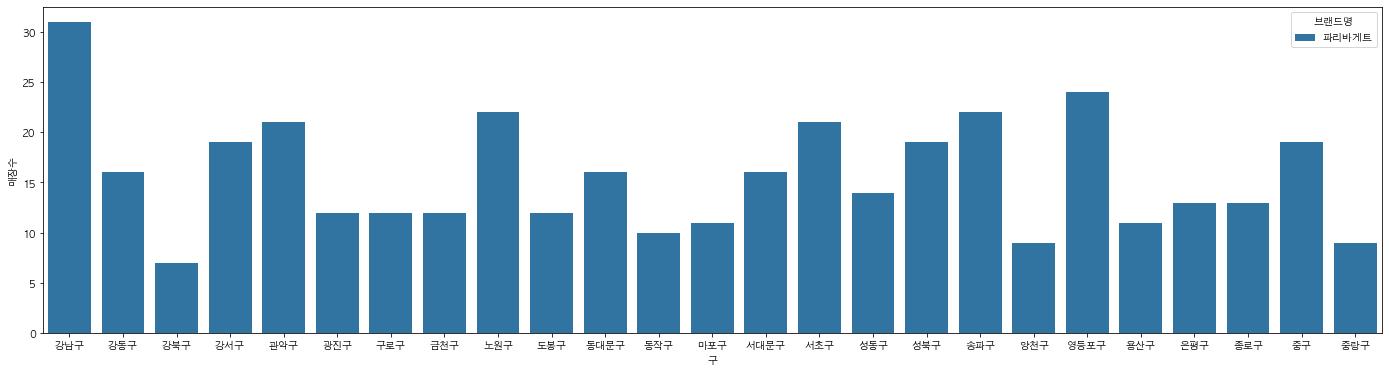

In [12]:
#구별 파리바게트 매장수
df_paris_count=pd.DataFrame(df_paris.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()
df_paris_count.columns=['구','브랜드명','매장수']

matplotlib.rcParams['font.family'] = "AppleGothic"

# 그래프 생성
plt.figure(figsize=(24,6))
sns.barplot(data=df_paris_count, x='구', y="매장수", hue='브랜드명')

In [13]:
#geo 정보 가져오기
geo_path=os.getcwd()+'/seoul_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path, encoding='utf-8'))
paris_map_ = folium.Map(location=[37.563, 126.982], zoom_start=11)

folium.Choropleth(geo_data=geo_str,
                      name='choropleth',
                      data=df_paris_count,
                      columns=['구','매장수'],
                      fill_color='PuBu',
                      key_on='feature.properties.name'
                     ).add_to(paris_map_)

paris_map_

In [14]:
#실행하는데 오래걸려서 'df_paris_distances_2' 파일로 대체합니다!

#distances_m=[]
#df_paris_distances=df_paris
#for i in range(len(crosswalk)):
#    crosswalk_=(crosswalk.loc[i,'경도'],crosswalk.loc[i,'위도'])
#    
#    for row in df_paris.itertuples(index=False):
#        paris_=(row.경도,row.위도)
#        distances_m.append(
#            haversine(crosswalk_,paris_, unit = 'm')
#        )
#    if i>0:
#        df_paris_distances=pd.concat([df_paris_distances,df_paris]4)

In [15]:
#df_res1=df_paris_distances.reset_index(drop=True)
#df_res1['Distance'] = distances_m
#df_res1
#df_res1.to_csv('df_paris_distances_2.csv')

In [16]:
#파일 불러오기
df_res1=pd.read_csv(os.getcwd()+"/df_paris_distances_2.csv")
df_res1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [17]:
#Distance 내림차순으로 정렬
sdf_res1=df_res1.sort_values(by=['Distance'])
sdf_res1

상호명          경도         위도                  도로명주소     종류  \
7766957            파리바게뜨  126.992631  37.566263       서울특별시 중구 을지로 129  파리바게트   
5931016            파리바게뜨  127.041392  37.627453   서울특별시 강북구 한천로109길 53  파리바게트   
6283395         적십자파리바게뜨  126.967190  37.566755       서울특별시 종로구 새문안로 9  파리바게트   
4934583            파리바게뜨  126.968911  37.540414      서울특별시 용산구 원효로 255  파리바게트   
10408096       파리바게뜨번동지점  127.028950  37.640777      서울특별시 강북구 도봉로 382  파리바게트   
...                  ...         ...        ...                    ...    ...   
9160133   파리바게트13275상일중앙  127.168956  37.557219      서울특별시 강동구 고덕로 391  파리바게트   
9131160            파리바게뜨  127.173311  37.571766  서울특별시 강동구 아리수로93나길 26  파리바게트   
9160094            파리바게뜨  127.173311  37.571766  서울특별시 강동구 아리수로93나길 26  파리바게트   
9131330     파리바게뜨강일리버파크점  127.173798  37.565615   서울특별시 강동구 아리수로93길 27  파리바게트   
9160264     파리바게뜨강일리버파크점  127.173798  37.565615   서울특별시 강동구 아리수로93길 27  파리바게트   

              Distance  
7766957       5.449048  
5931016       8.165551  
6283395       8.419636  
4934583       8.640194  
10408096      8.877482  
...                ...  
9160133   44441.862463  
9131160   44938.365195  
9160094   44938.785445  
9131330   44984.049933  
9160264   44984.996523  

[12564003 rows x 6 columns]

In [18]:
#중복제거
sdf_res1_=sdf_res1.drop_duplicates(['도로명주소'])
sdf_res1_=sdf_res1_.reset_index(drop=True)
sdf_res1_

상호명          경도         위도                  도로명주소     종류  \
0          파리바게뜨  126.992631  37.566263       서울특별시 중구 을지로 129  파리바게트   
1          파리바게뜨  127.041392  37.627453   서울특별시 강북구 한천로109길 53  파리바게트   
2       적십자파리바게뜨  126.967190  37.566755       서울특별시 종로구 새문안로 9  파리바게트   
3          파리바게뜨  126.968911  37.540414      서울특별시 용산구 원효로 255  파리바게트   
4      파리바게뜨번동지점  127.028950  37.640777      서울특별시 강북구 도봉로 382  파리바게트   
..           ...         ...        ...                    ...    ...   
386   파리바게뜨이화사랑점  126.950301  37.564281    서울특별시 서대문구 이화여대길 52  파리바게트   
387        파리바게뜨  126.826696  37.568659  서울특별시 강서구 마곡중앙5로1길 20  파리바게트   
388        파리바게뜨  126.835066  37.560326    서울특별시 강서구 마곡중앙6로 69  파리바게트   
389        파리바게뜨  127.142770  37.481677    서울특별시 송파구 위례광장로 199  파리바게트   
390  위례아이파크파리바게뜨  127.142196  37.476482    서울특별시 송파구 위례광장로 136  파리바게트   

       Distance  
0      5.449048  
1      8.165551  
2      8.419636  
3      8.640194  
4      8.877482  
..          ...  
386  251.401415  
387  284.814773  
388  347.352355  
389  487.384388  
390  839.169310  

[391 rows x 6 columns]

In [19]:
#횡단보도로부터 50m
sdf_res1_50=sdf_res1_[sdf_res1_['Distance']<50]
sdf_res1_50

상호명          경도         위도                 도로명주소     종류   Distance
0        파리바게뜨  126.992631  37.566263      서울특별시 중구 을지로 129  파리바게트   5.449048
1        파리바게뜨  127.041392  37.627453  서울특별시 강북구 한천로109길 53  파리바게트   8.165551
2     적십자파리바게뜨  126.967190  37.566755      서울특별시 종로구 새문안로 9  파리바게트   8.419636
3        파리바게뜨  126.968911  37.540414     서울특별시 용산구 원효로 255  파리바게트   8.640194
4    파리바게뜨번동지점  127.028950  37.640777     서울특별시 강북구 도봉로 382  파리바게트   8.877482
..         ...         ...        ...                   ...    ...        ...
288      파리바게뜨  127.031661  37.512905     서울특별시 강남구 논현로 660  파리바게트  48.395702
289      파리바게뜨  126.988959  37.538975     서울특별시 용산구 회나무로 20  파리바게트  48.750725
290      파리바게뜨  127.077104  37.588759  서울특별시 중랑구 동일로101길 49  파리바게트  49.212432
291  파리바게뜨당고개점  127.079109  37.666687     서울특별시 노원구 덕릉로 780  파리바게트  49.230449
292   파리바게트방화역  126.812985  37.577343    서울특별시 강서구 금낭화로 136  파리바게트  49.482216

[293 rows x 6 columns]

In [20]:
#횡단보도로부터 70m
sdf_res1_70=sdf_res1_[sdf_res1_['Distance']<70]
sdf_res1_70

상호명          경도         위도                  도로명주소     종류  \
0            파리바게뜨  126.992631  37.566263       서울특별시 중구 을지로 129  파리바게트   
1            파리바게뜨  127.041392  37.627453   서울특별시 강북구 한천로109길 53  파리바게트   
2         적십자파리바게뜨  126.967190  37.566755       서울특별시 종로구 새문안로 9  파리바게트   
3            파리바게뜨  126.968911  37.540414      서울특별시 용산구 원효로 255  파리바게트   
4        파리바게뜨번동지점  127.028950  37.640777      서울특별시 강북구 도봉로 382  파리바게트   
..             ...         ...        ...                    ...    ...   
313          파리바게뜨  126.926080  37.507352  서울특별시 동작구 여의대방로44길 10  파리바게트   
314  파리바게뜨카페하월곡동일점  127.033026  37.607805      서울특별시 성북구 종암로 196  파리바게트   
315         파리바게뜨역  126.928906  37.498781      서울특별시 동작구 국사봉1길 4  파리바게트   
316          파리바게뜨  126.942917  37.563801      서울특별시 서대문구 연세로 50  파리바게트   
317          파리바게뜨  127.041853  37.659516      서울특별시 도봉구 도봉로 618  파리바게트   

      Distance  
0     5.449048  
1     8.165551  
2     8.419636  
3     8.640194  
4     8.877482  
..         ...  
313  62.950675  
314  63.712125  
315  65.489912  
316  69.124476  
317  69.857016  

[318 rows x 6 columns]

In [21]:
#횡단보도로부터 100m
sdf_res1_100=sdf_res1_[sdf_res1_['Distance']<100]
sdf_res1_100

상호명          경도         위도                    도로명주소     종류  \
0           파리바게뜨  126.992631  37.566263         서울특별시 중구 을지로 129  파리바게트   
1           파리바게뜨  127.041392  37.627453     서울특별시 강북구 한천로109길 53  파리바게트   
2        적십자파리바게뜨  126.967190  37.566755         서울특별시 종로구 새문안로 9  파리바게트   
3           파리바게뜨  126.968911  37.540414        서울특별시 용산구 원효로 255  파리바게트   
4       파리바게뜨번동지점  127.028950  37.640777        서울특별시 강북구 도봉로 382  파리바게트   
..            ...         ...        ...                      ...    ...   
350  파리바게뜨금천롯데캐슬점  126.892984  37.459966         서울특별시 금천구 벚꽃로 40  파리바게트   
351         파리바게뜨  126.916391  37.532898       서울특별시 영등포구 의사당대로 1  파리바게트   
352     파리바게트삼성화재  126.918093  37.621746      서울특별시 은평구 갈현로36길 13  파리바게트   
353      파리바게뜨휘경점  127.061343  37.589589        서울특별시 동대문구 망우로 74  파리바게트   
354         파리바게뜨  127.037067  37.478610  서울특별시 서초구 강남대로27길 15-12  파리바게트   

      Distance  
0     5.449048  
1     8.165551  
2     8.419636  
3     8.640194  
4     8.877482  
..         ...  
350  90.273162  
351  90.726976  
352  96.331418  
353  96.961207  
354  98.704188  

[355 rows x 6 columns]

## 스타벅스_올리브영_입지관계

In [22]:
shop_2021=shop_2021[['상호명','경도','위도','시군구명','도로명주소']]

In [23]:
#스타벅스, 올리브영 데이터
df_shop = shop_2021[shop_2021['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|올리브영|oliveyoung|OLIVEYOUNG',na=False)]
df_shop.loc[df_shop['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].value_counts()
#중복제거
df_shop=df_shop.drop_duplicates(['도로명주소'])

In [65]:
df_shop.loc[df_shop['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '스타벅스'
df_shop.loc[~df_shop['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '올리브영'
df_shop[['상호명','브랜드명']]

상호명  브랜드명
193      올리브영홈플러스금천점  올리브영
434     클리오올리브영압구정역점  올리브영
1684            스타벅스  스타벅스
1773         씨제이올리브영  올리브영
1898         씨제이올리브영  올리브영
...              ...   ...
312928    스타벅스조선호텔후문  스타벅스
313462      스타벅스삼성교점  스타벅스
315376          올리브영  올리브영
316044          스타벅스  스타벅스
317963          스타벅스  스타벅스

[699 rows x 2 columns]

In [26]:
df_starbucks=df_shop[df_shop['상호명'].str.contains('스타벅스|starbucks|STARBUCKS',na=False)]
df_oliveyoung=df_shop[df_shop['상호명'].str.contains('올리브영|oliveyoung|OLIVEYOUNG',na=False)]

In [27]:
#null 확인
df_shop.isnull().sum()

상호명      0
경도       0
위도       0
시군구명     0
도로명주소    0
브랜드명     0
dtype: int64

In [28]:
# folium으로 지도에 위치 찍기
geo_df = df_shop.copy()

shop_map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    #팝업에 들어갈 텍스트를 지정
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    #브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n,'브랜드명'] == '스타벅스':
        icon_color = 'green'
    else:
        icon_color = 'blue'

    folium.features.CircleMarker(
        location = [geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
        radius=3,
        popup = popup_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color
    ).add_to(shop_map)

shop_map

In [29]:
shop_map.save('shop_map.html')

<AxesSubplot:xlabel='구', ylabel='매장수'>

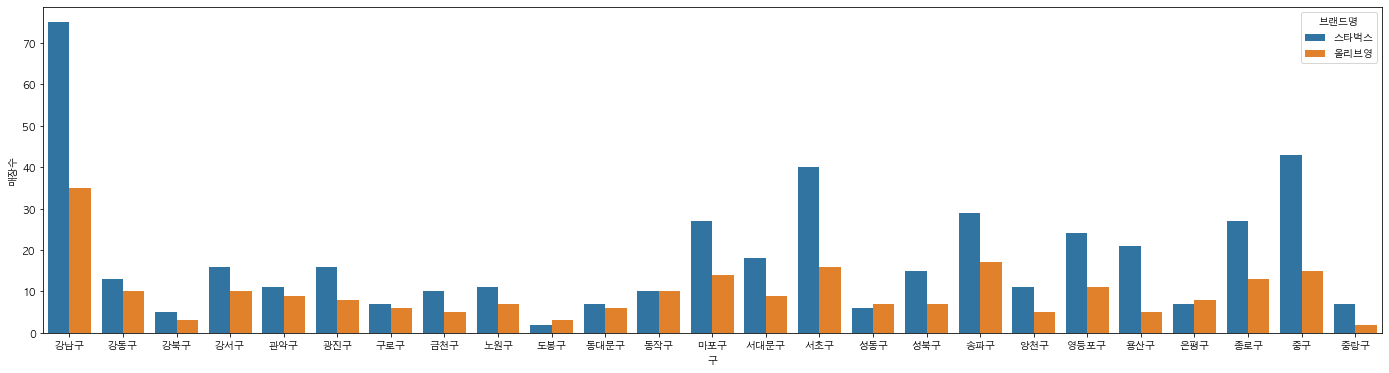

In [30]:
#구별 스타벅스, 올리브영 매장수
df_shop_count = pd.DataFrame(df_shop.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()
df_shop_count.columns = ['구', '브랜드명', '매장수']

matplotlib.rcParams['font.family'] = "AppleGothic"

# 그래프 생성
plt.figure(figsize=(24,6))
sns.barplot(data=df_shop_count, x="구", y="매장수", hue = '브랜드명')

In [31]:
df_oliveyoung=df_oliveyoung.reset_index(drop=True)
df_starbucks=df_starbucks.reset_index(drop=True)

In [32]:
distances_m=[]
df_oliveyoung_distances=df_oliveyoung
for i in range(len(df_starbucks)):
    starbucks=(df_starbucks.loc[i,'경도'],df_starbucks.loc[i,'위도'])
    
    for row in df_oliveyoung.itertuples(index=False):
        oliveyoung=(row.경도,row.위도)
        distances_m.append(
            haversine(starbucks,oliveyoung,unit = 'm')
        )
    if i>0:
        df_oliveyoung_distances=pd.concat([df_oliveyoung_distances,df_oliveyoung])

In [33]:
df_res2=df_oliveyoung_distances.reset_index(drop=True)
df_res2['Distance'] = distances_m
df_res2

상호명          경도         위도  시군구명                 도로명주소  \
0           올리브영홈플러스금천점  126.896869  37.468653   금천구    서울특별시 금천구 시흥대로 391   
1          클리오올리브영압구정역점  127.028932  37.527083   강남구     서울특별시 강남구 논현로 878   
2               씨제이올리브영  126.936671  37.558870  서대문구     서울특별시 서대문구 연세로 37   
3               씨제이올리브영  126.985983  37.569071   종로구    서울특별시 종로구 종로12길 21   
4               씨제이올리브영  127.126373  37.538098   강동구   서울특별시 강동구 천호대로 1027   
...                 ...         ...        ...   ...                   ...   
110373          씨제이올리브영  127.032784  37.562625   성동구    서울특별시 성동구 왕십리로 331   
110374  씨제이올리브영건대몰오브케이점  127.066868  37.539751   광진구  서울특별시 광진구 아차산로30길 26   
110375          씨제이올리브영  127.072162  37.626546   노원구    서울특별시 노원구 동일로 1083   
110376      올리브영잠실역8호선점  127.104200  37.514973   송파구    서울특별시 송파구 올림픽로 305   
110377             올리브영  127.028731  37.556564   성동구      서울특별시 성동구 행당로 84   

        브랜드명      Distance  
0       올리브영  14141.776163  
1       올리브영   4663.733545  
2       올리브영   7645.809684  
3       올리브영   2197.211822  
4       올리브영  13947.844027  
...      ...           ...  
110373  올리브영  18496.168692  
110374  올리브영  22281.091136  
110375  올리브영  23413.318390  
110376  올리브영  26528.201663  
110377  올리브영  18032.628896  

[110378 rows x 7 columns]

In [34]:
#Distance 내림차순으로 정렬
sdf_res2=df_res2.sort_values(by=['Distance'])
sdf_res2

상호명          경도         위도  시군구명                 도로명주소  브랜드명  \
46274     씨제이올리브영  126.936671  37.558870  서대문구     서울특별시 서대문구 연세로 37  올리브영   
84167   올리브영선릉2호점  127.051246  37.503612   강남구  서울특별시 강남구 테헤란로64길 20  올리브영   
78322     씨제이올리브영  127.072162  37.626546   노원구    서울특별시 노원구 동일로 1083  올리브영   
81183     씨제이올리브영  127.022687  37.507163   서초구    서울특별시 서초구 강남대로 507  올리브영   
9522      올리브영신림점  126.929171  37.485755   관악구     서울특별시 관악구 신림로 353  올리브영   
...           ...         ...        ...   ...                   ...   ...   
10762        올리브영  126.825184  37.567616   강서구    서울특별시 강서구 마곡서로 152  올리브영   
53886     씨제이올리브영  127.169656  37.557396   강동구     서울특별시 강동구 고덕로 399  올리브영   
108911       올리브영  126.800760  37.565956   강서구      서울특별시 강서구 하늘길 38  올리브영   
10623        올리브영  126.810266  37.561133   강서구     서울특별시 강서구 공항대로 28  올리브영   
10824        올리브영  126.800760  37.565956   강서구      서울특별시 강서구 하늘길 38  올리브영   

            Distance  
46274      10.586236  
84167      12.836702  
78322      15.854114  
81183      17.587187  
9522       22.335169  
...              ...  
10762   38812.807165  
53886   39300.064361  
108911  39507.628372  
10623   40461.133326  
10824   41524.638380  

[110378 rows x 7 columns]

In [35]:
#중복제거
sdf_res2_=sdf_res2.drop_duplicates(['도로명주소'])
sdf_res2_=sdf_res2_.reset_index(drop=True)
sdf_res2_

상호명          경도         위도  시군구명                    도로명주소  브랜드명  \
0      씨제이올리브영  126.936671  37.558870  서대문구        서울특별시 서대문구 연세로 37  올리브영   
1    올리브영선릉2호점  127.051246  37.503612   강남구     서울특별시 강남구 테헤란로64길 20  올리브영   
2      씨제이올리브영  127.072162  37.626546   노원구       서울특별시 노원구 동일로 1083  올리브영   
3      씨제이올리브영  127.022687  37.507163   서초구       서울특별시 서초구 강남대로 507  올리브영   
4      올리브영신림점  126.929171  37.485755   관악구        서울특별시 관악구 신림로 353  올리브영   
..         ...         ...        ...   ...                      ...   ...   
236       올리브영  126.832417  37.512482   양천구      서울특별시 양천구 신정이펜2로 14  올리브영   
237    씨제이올리브영  127.055683  37.678089   노원구       서울특별시 노원구 동일로 1678  올리브영   
238    씨제이올리브영  127.100145  37.466375   강남구  서울특별시 강남구 헌릉로569길 21-36  올리브영   
239    씨제이올리브영  126.859015  37.495018   구로구      서울특별시 구로구 경인로40길 41  올리브영   
240       올리브영  126.800760  37.565956   강서구         서울특별시 강서구 하늘길 38  올리브영   

        Distance  
0      10.586236  
1      12.836702  
2      15.854114  
3      17.587187  
4      22.335169  
..           ...  
236  1135.889728  
237  1158.025724  
238  1463.615526  
239  1577.111265  
240  1825.544049  

[241 rows x 7 columns]

In [36]:
#스타벅스로부터 100m
sdf_res2_100=sdf_res2_[sdf_res2_['Distance']<100]
sdf_res2_100

상호명          경도         위도  시군구명                  도로명주소  브랜드명  \
0      씨제이올리브영  126.936671  37.558870  서대문구      서울특별시 서대문구 연세로 37  올리브영   
1    올리브영선릉2호점  127.051246  37.503612   강남구   서울특별시 강남구 테헤란로64길 20  올리브영   
2      씨제이올리브영  127.072162  37.626546   노원구     서울특별시 노원구 동일로 1083  올리브영   
3      씨제이올리브영  127.022687  37.507163   서초구     서울특별시 서초구 강남대로 507  올리브영   
4      올리브영신림점  126.929171  37.485755   관악구      서울특별시 관악구 신림로 353  올리브영   
..         ...         ...        ...   ...                    ...   ...   
74        올리브영  127.035751  37.485168   강남구   서울특별시 강남구 남부순환로 2615  올리브영   
75    올리브영강변역점  127.093388  37.535344   광진구    서울특별시 광진구 강변역로4길 10  올리브영   
76   올리브영신논현역점  127.024508  37.505421   강남구     서울특별시 강남구 강남대로 482  올리브영   
77        올리브영  126.965843  37.475746   관악구  서울특별시 관악구 남부순환로248길 3  올리브영   
78  올리브영남부터미널점  127.015015  37.485006   서초구      서울특별시 서초구 효령로 283  올리브영   

     Distance  
0   10.586236  
1   12.836702  
2   15.854114  
3   17.587187  
4   22.335169  
..        ...  
74  95.590349  
75  96.456861  
76  98.202099  
77  98.478733  
78  99.894706  

[79 rows x 7 columns]

In [37]:
#스타벅스로부터 150m
sdf_res2_150=sdf_res2_[sdf_res2_['Distance']<150]
sdf_res2_150

상호명          경도         위도  시군구명                 도로명주소  브랜드명  \
0           씨제이올리브영  126.936671  37.558870  서대문구     서울특별시 서대문구 연세로 37  올리브영   
1         올리브영선릉2호점  127.051246  37.503612   강남구  서울특별시 강남구 테헤란로64길 20  올리브영   
2           씨제이올리브영  127.072162  37.626546   노원구    서울특별시 노원구 동일로 1083  올리브영   
3           씨제이올리브영  127.022687  37.507163   서초구    서울특별시 서초구 강남대로 507  올리브영   
4           올리브영신림점  126.929171  37.485755   관악구     서울특별시 관악구 신림로 353  올리브영   
..              ...         ...        ...   ...                   ...   ...   
104        올리브영홍제역점  126.945072  37.588346  서대문구    서울특별시 서대문구 통일로 440  올리브영   
105            올리브영  127.025555  37.503132   강남구    서울특별시 강남구 강남대로 456  올리브영   
106         씨제이올리브영  126.974498  37.558790    중구    서울특별시 중구 세종대로 26-1  올리브영   
107     올리브영홈플러스금천점  126.896869  37.468653   금천구    서울특별시 금천구 시흥대로 391  올리브영   
108  씨제이올리브영신촌명물거리점  126.939309  37.558795  서대문구     서울특별시 서대문구 명물길 54  올리브영   

       Distance  
0     10.586236  
1     12.836702  
2     15.854114  
3     17.587187  
4     22.335169  
..          ...  
104  139.310801  
105  139.457015  
106  139.914775  
107  141.486213  
108  147.849240  

[109 rows x 7 columns]

In [38]:
#스타벅스로부터 200m
sdf_res2_200=sdf_res2_[sdf_res2_['Distance']<200]
sdf_res2_200

상호명          경도         위도  시군구명                 도로명주소  브랜드명  \
0        씨제이올리브영  126.936671  37.558870  서대문구     서울특별시 서대문구 연세로 37  올리브영   
1      올리브영선릉2호점  127.051246  37.503612   강남구  서울특별시 강남구 테헤란로64길 20  올리브영   
2        씨제이올리브영  127.072162  37.626546   노원구    서울특별시 노원구 동일로 1083  올리브영   
3        씨제이올리브영  127.022687  37.507163   서초구    서울특별시 서초구 강남대로 507  올리브영   
4        올리브영신림점  126.929171  37.485755   관악구     서울특별시 관악구 신림로 353  올리브영   
..           ...         ...        ...   ...                   ...   ...   
130    올리브영신설동역점  127.024023  37.575600  동대문구      서울특별시 동대문구 왕산로 4  올리브영   
131    올리브영오목교역점  126.875129  37.523709   양천구     서울특별시 양천구 오목로 344  올리브영   
132      씨제이올리브영  127.018153  37.593320   성북구    서울특별시 성북구 동소문로 118  올리브영   
133  올리브영잠실역8호선점  127.104200  37.514973   송파구    서울특별시 송파구 올림픽로 305  올리브영   
134  올리브영위례아이파크점  127.142223  37.477113   송파구   서울특별시 송파구 위례광장로 136  올리브영   

       Distance  
0     10.586236  
1     12.836702  
2     15.854114  
3     17.587187  
4     22.335169  
..          ...  
130  180.367296  
131  182.672579  
132  183.492674  
133  185.255083  
134  194.662610  

[135 rows x 7 columns]

In [39]:
#스타벅스로부터 250m
sdf_res2_250=sdf_res2_[sdf_res2_['Distance']<250]
sdf_res2_250

상호명          경도         위도  시군구명                 도로명주소  브랜드명  \
0         씨제이올리브영  126.936671  37.558870  서대문구     서울특별시 서대문구 연세로 37  올리브영   
1       올리브영선릉2호점  127.051246  37.503612   강남구  서울특별시 강남구 테헤란로64길 20  올리브영   
2         씨제이올리브영  127.072162  37.626546   노원구    서울특별시 노원구 동일로 1083  올리브영   
3         씨제이올리브영  127.022687  37.507163   서초구    서울특별시 서초구 강남대로 507  올리브영   
4         올리브영신림점  126.929171  37.485755   관악구     서울특별시 관악구 신림로 353  올리브영   
..            ...         ...        ...   ...                   ...   ...   
151  클리오올리브영충무로역점  126.996396  37.561528    중구      서울특별시 중구 퇴계로 222  올리브영   
152      올리브영대학로점  127.000472  37.583494   종로구      서울특별시 종로구 대명길 18  올리브영   
153     씨제이올리브영공덕  126.953084  37.547438   마포구    서울특별시 마포구 마포대로 143  올리브영   
154          올리브영  127.072944  37.536997   광진구    서울특별시 광진구 아차산로 262  올리브영   
155          올리브영  126.954278  37.482952   관악구     서울특별시 관악구 관악로 204  올리브영   

       Distance  
0     10.586236  
1     12.836702  
2     15.854114  
3     17.587187  
4     22.335169  
..          ...  
151  243.563439  
152  244.126442  
153  244.151988  
154  244.538264  
155  246.965013  

[156 rows x 7 columns]

In [40]:
df2_concat=pd.concat([sdf_res2_150,df_starbucks],ignore_index=True)
df2_concat

상호명          경도         위도  시군구명                 도로명주소  브랜드명  \
0       씨제이올리브영  126.936671  37.558870  서대문구     서울특별시 서대문구 연세로 37  올리브영   
1     올리브영선릉2호점  127.051246  37.503612   강남구  서울특별시 강남구 테헤란로64길 20  올리브영   
2       씨제이올리브영  127.072162  37.626546   노원구    서울특별시 노원구 동일로 1083  올리브영   
3       씨제이올리브영  127.022687  37.507163   서초구    서울특별시 서초구 강남대로 507  올리브영   
4       올리브영신림점  126.929171  37.485755   관악구     서울특별시 관악구 신림로 353  올리브영   
..          ...         ...        ...   ...                   ...   ...   
562     스타벅스목동점  126.878537  37.536383   양천구     서울특별시 양천구 목동서로 67  스타벅스   
563  스타벅스조선호텔후문  126.980757  37.563764    중구    서울특별시 중구 남대문로7길 19  스타벅스   
564    스타벅스삼성교점  127.065173  37.507813   강남구  서울특별시 강남구 영동대로86길 12  스타벅스   
565        스타벅스  127.052091  37.498518   강남구     서울특별시 강남구 선릉로 324  스타벅스   
566        스타벅스  126.866598  37.550721   강서구    서울특별시 강서구 공항대로 541  스타벅스   

      Distance  
0    10.586236  
1    12.836702  
2    15.854114  
3    17.587187  
4    22.335169  
..         ...  
562        NaN  
563        NaN  
564        NaN  
565        NaN  
566        NaN  

[567 rows x 7 columns]

In [41]:
# folium으로 지도에 위치 찍기
geo_df_res2 = df2_concat.copy()

oliveyoung_map = folium.Map(location=[geo_df_res2['위도'].mean(), geo_df_res2['경도'].mean()], zoom_start=12)

for n in geo_df_res2.index:
    #팝업에 들어갈 텍스트를 지정
    popup_name = geo_df_res2.loc[n, '상호명'] + ' - ' + geo_df_res2.loc[n, '도로명주소']
    #브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df_res2.loc[n,'브랜드명'] == '올리브영':
        icon_color = 'red'
        icon_radius=5
        icon_opacity=1
        icon_fill_opacity=1
    else:
        icon_color = 'blue'
        icon_radius=2
        icon_opacity=0.3

    folium.features.CircleMarker(
        location = [geo_df_res2.loc[n,'위도'], geo_df_res2.loc[n,'경도']],
        radius=icon_radius,
        popup = popup_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color,
        opacity=icon_opacity,
    ).add_to(oliveyoung_map)

oliveyoung_map

In [42]:
oliveyoung_map.save('oliveyoung_map.html')

## 스타벅스_이디야_입지관계

In [43]:
shop_2021=shop_2021[['상호명','경도','위도','시군구명','도로명주소']]

In [44]:
#스타벅스, 이디야 데이터
df_cafe = shop_2021[shop_2021['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA',na=False)]
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'상호명'].value_counts()
#중복제거
df_cafe=df_cafe.drop_duplicates(['도로명주소'])

In [45]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '스타벅스'
df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '이디야'
df_cafe[['상호명','브랜드명']]

상호명  브랜드명
1249          이디야커피   이디야
1684           스타벅스  스타벅스
1741          이디야커피   이디야
2714     이디야커피양재AT점   이디야
2779    스타벅스남부터미널2점  스타벅스
...             ...   ...
312928   스타벅스조선호텔후문  스타벅스
313462     스타벅스삼성교점  스타벅스
313905        이디야커피   이디야
316044         스타벅스  스타벅스
317963         스타벅스  스타벅스

[906 rows x 2 columns]

In [47]:
df_starbucks=df_cafe[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS',na=False)]
df_ediya=df_cafe[df_cafe['상호명'].str.contains('이디야|ediya|EDIYA',na=False)]

In [48]:
#null 확인
df_cafe.isnull().sum()

상호명      0
경도       0
위도       0
시군구명     0
도로명주소    0
브랜드명     0
dtype: int64

In [49]:
# folium으로 지도에 위치 찍기
geo_df = df_cafe.copy()

cafe_map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    #팝업에 들어갈 텍스트를 지정
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    #브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n,'브랜드명'] == '스타벅스':
        icon_color = 'green'
    else:
        icon_color = 'blue'

    folium.features.CircleMarker(
        location = [geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
        radius=3,
        popup = popup_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color
    ).add_to(cafe_map)

cafe_map

In [50]:
cafe_map.save('cafe_map.html')

<AxesSubplot:xlabel='구', ylabel='매장수'>

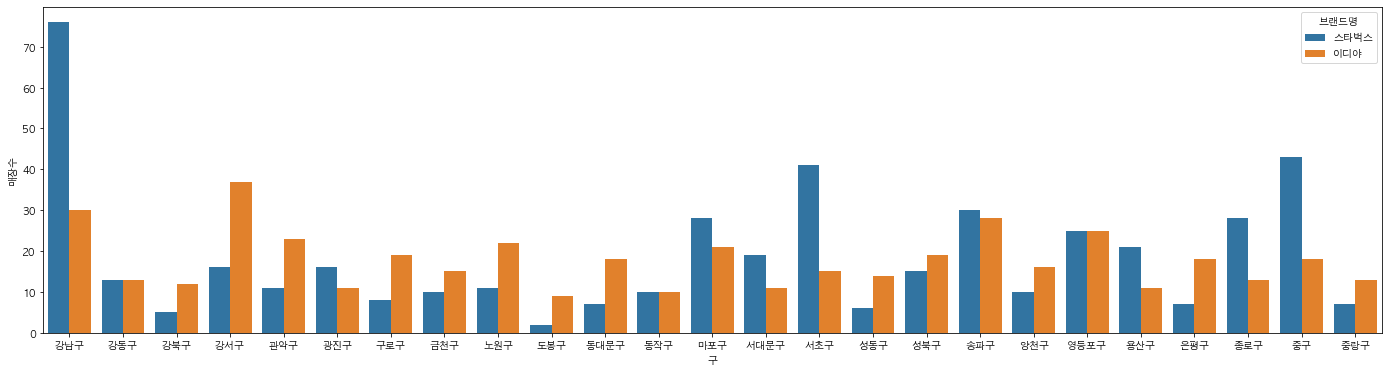

In [51]:
#구별 스타벅스, 이디야 매장수
df_cafe_brand = pd.DataFrame(df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']

matplotlib.rcParams['font.family'] = "AppleGothic"

# 그래프 생성
plt.figure(figsize=(24,6))
sns.barplot(data=df_cafe_brand, x="구", y="매장수", hue = '브랜드명')

In [52]:
df_ediya=df_ediya.reset_index(drop=True)
df_starbucks=df_starbucks.reset_index(drop=True)

In [53]:
distances_m=[]
df_ediya_distances=df_ediya
for i in range(len(df_starbucks)):
    starbucks=(df_starbucks.loc[i,'경도'],df_starbucks.loc[i,'위도'])
    
    for row in df_ediya.itertuples(index=False):
        ediya=(row.경도,row.위도)
        distances_m.append(
            haversine(starbucks,ediya,unit = 'm')
        )
    if i>0:
        df_ediya_distances=pd.concat([df_ediya_distances,df_ediya])

In [54]:
df_res3=df_ediya_distances.reset_index(drop=True)
df_res3['Distance'] = distances_m
df_res3

상호명          경도         위도  시군구명                 도로명주소 브랜드명  \
0            이디야커피  126.918062  37.515118  영등포구   서울특별시 영등포구 영등포로 353  이디야   
1            이디야커피  126.939198  37.519544  영등포구     서울특별시 영등포구 63로 40  이디야   
2       이디야커피양재AT점  127.040265  37.469075   서초구       서울특별시 서초구 동산로 3  이디야   
3            이디야커피  126.913646  37.449066   금천구     서울특별시 금천구 금하로 750  이디야   
4            이디야커피  126.854872  37.486436   구로구    서울특별시 구로구 개봉로3길 26  이디야   
...            ...         ...        ...   ...                   ...  ...   
205060  이디야커피애오개역점  126.956827  37.552508   마포구    서울특별시 마포구 마포대로 208  이디야   
205061       이디야커피  126.936180  37.475519   관악구     서울특별시 관악구 신림로 199  이디야   
205062    이디야노원사거리  127.012022  37.662099   강북구  서울특별시 강북구 삼양로171길 21  이디야   
205063       이디야커피  127.035758  37.563685   성동구    서울특별시 성동구 고산자로 269  이디야   
205064       이디야커피  126.838571  37.529951   강서구     서울특별시 강서구 곰달래로 52  이디야   

            Distance  
0       10566.525190  
1        8350.405056  
2        8631.682696  
3       13447.043378  
4       17780.512662  
...              ...  
205060  10033.752811  
205061   9223.543372  
205062  17801.110122  
205063  18829.754501  
205064   3410.451268  

[205065 rows x 7 columns]

In [55]:
#거리 내림차순으로 정렬
sdf_res3=df_res3.sort_values(by=['Distance'])
sdf_res3

상호명          경도         위도 시군구명               도로명주소 브랜드명  \
104202    이디야커피약수점  127.010815  37.555694   중구    서울특별시 중구 다산로 131  이디야   
149433       이디야커피  127.074850  37.593318  중랑구   서울특별시 중랑구 망우로 198  이디야   
60155        이디야커피  126.878696  37.535600  양천구  서울특별시 양천구 목동동로 379  이디야   
9781    이디야커피을지로역점  126.982997  37.567171   중구   서울특별시 중구 남대문로 112  이디야   
150022       이디야커피  126.985784  37.577026  종로구     서울특별시 종로구 북촌로 1  이디야   
...            ...         ...        ...  ...                 ...  ...   
19767      EDIYA카페  126.809952  37.560949  강서구    서울특별시 강서구 송정로 70  이디야   
19507        이디야커피  126.809937  37.561157  강서구   서울특별시 강서구 공항대로 24  이디야   
19820        이디야커피  126.806897  37.572245  강서구    서울특별시 강서구 양천로 28  이디야   
19686        이디야커피  126.802937  37.571357  강서구    서울특별시 강서구 하늘길 38  이디야   
19568        이디야커피  126.802364  37.561909  강서구    서울특별시 강서구 하늘길 77  이디야   

            Distance  
104202     21.184802  
149433     21.229364  
60155      23.745564  
9781       23.949566  
150022     28.382727  
...              ...  
19767   40495.834473  
19507   40497.695771  
19820   40855.154473  
19686   41293.099605  
19568   41340.519007  

[205065 rows x 7 columns]

In [56]:
#중복제거
sdf_res3_=sdf_res3.drop_duplicates(['도로명주소'])
sdf_res3_=sdf_res3_.reset_index(drop=True)
sdf_res3_

상호명          경도         위도 시군구명                 도로명주소 브랜드명  \
0       이디야커피약수점  127.010815  37.555694   중구      서울특별시 중구 다산로 131  이디야   
1          이디야커피  127.074850  37.593318  중랑구     서울특별시 중랑구 망우로 198  이디야   
2          이디야커피  126.878696  37.535600  양천구    서울특별시 양천구 목동동로 379  이디야   
3     이디야커피을지로역점  126.982997  37.567171   중구     서울특별시 중구 남대문로 112  이디야   
4          이디야커피  126.985784  37.577026  종로구       서울특별시 종로구 북촌로 1  이디야   
..           ...         ...        ...  ...                   ...  ...   
436  이디야커피도봉산역사점  127.046131  37.689203  도봉구  서울특별시 도봉구 도봉로 964-33  이디야   
437        이디야커피  127.043726  37.687526  도봉구     서울특별시 도봉구 도봉산길 18  이디야   
438        이디야커피  127.011347  37.662571  강북구  서울특별시 강북구 삼양로173길 21  이디야   
439        이디야커피  127.005589  37.644754  강북구     서울특별시 강북구 419로 85  이디야   
440        이디야커피  126.824344  37.487722  구로구     서울특별시 구로구 연동로 312  이디야   

        Distance  
0      21.184802  
1      21.229364  
2      23.745564  
3      23.949566  
4      28.382727  
..           ...  
436  2249.832070  
437  2317.642168  
438  2322.622099  
439  2325.626320  
440  2349.199260  

[441 rows x 7 columns]

In [57]:
#스타벅스로부터 100m
sdf_res3_100=sdf_res3_[sdf_res3_['Distance']<100]
sdf_res3_100

상호명          경도         위도  시군구명                  도로명주소 브랜드명  \
0        이디야커피약수점  127.010815  37.555694    중구       서울특별시 중구 다산로 131  이디야   
1           이디야커피  127.074850  37.593318   중랑구      서울특별시 중랑구 망우로 198  이디야   
2           이디야커피  126.878696  37.535600   양천구     서울특별시 양천구 목동동로 379  이디야   
3      이디야커피을지로역점  126.982997  37.567171    중구      서울특별시 중구 남대문로 112  이디야   
4           이디야커피  126.985784  37.577026   종로구        서울특별시 종로구 북촌로 1  이디야   
5           이디야커피  126.948324  37.502803   동작구      서울특별시 동작구 상도로 277  이디야   
6           이디야커피  127.051354  37.568299  동대문구    서울특별시 동대문구 천호대로 265  이디야   
7           이디야커피  126.874844  37.547232   강서구     서울특별시 강서구 공항대로 629  이디야   
8           이디야커피  126.917825  37.526856  영등포구    서울특별시 영등포구 의사당대로 22  이디야   
9           이디야커피  127.029857  37.610239   성북구       서울특별시 성북구 도봉로 11  이디야   
10          이디야커피  127.048144  37.503830   강남구     서울특별시 강남구 테헤란로 332  이디야   
11          이디야커피  127.050817  37.503518   강남구    서울특별시 강남구 선릉로86길 15  이디야   
12          이디야커피  126.891227  37.486324   구로구   서울특별시 구로구 디지털로31길 81  이디야   
13          이디야커피  127.123727  37.537961   강동구    서울특별시 강동구 천호대로 1006  이디야   
14          이디야커피  126.919252  37.529824  영등포구    서울특별시 영등포구 국회대로 780  이디야   
15          이디야커피  127.023197  37.505293   서초구   서울특별시 서초구 강남대로79길 10  이디야   
16      이디야커피마곡역점  126.829257  37.559755   강서구     서울특별시 강서구 공항대로 195  이디야   
17          이디야커피  126.913813  37.552292   마포구    서울특별시 마포구 양화로11길 54  이디야   
18          이디야커피  127.042861  37.500345   강남구     서울특별시 강남구 언주로81길 8  이디야   
19          이디야커피  127.030560  37.484341   서초구   서울특별시 서초구 남부순환로 2561  이디야   
20          이디야커피  127.066898  37.656995   노원구      서울특별시 노원구 노원로 452  이디야   
21          이디야커피  126.835118  37.559191   강서구    서울특별시 강서구 마곡중앙6로 66  이디야   
22      이디야커피경희대점  127.052504  37.591898  동대문구      서울특별시 동대문구 경희대로 4  이디야   
23          이디야커피  127.061601  37.494080   강남구   서울특별시 강남구 남부순환로 2937  이디야   
24  이디야커피한국수출입은행점  126.920723  37.528306  영등포구      서울특별시 영등포구 은행로 17  이디야   
25          이디야커피  126.910211  37.556367   마포구    서울특별시 마포구 월드컵로 82-1  이디야   
26          이디야커피  126.920846  37.554284   마포구      서울특별시 마포구 양화로 124  이디야   
27          이디야커피  127.079164  37.511555   송파구      서울특별시 송파구 올림픽로 76  이디야   
28          이디야커피  127.031833  37.491722   강남구   서울특별시 강남구 강남대로66길 14  이디야   
29    ediyacoffee  127.052022  37.519134   강남구      서울특별시 강남구 학동로 508  이디야   
30          이디야커피  126.863108  37.536073   강서구       서울특별시 강서구 등촌로 67  이디야   
31          이디야커피  127.035220  37.501788   강남구   서울특별시 강남구 테헤란로25길 17  이디야   
32          이디야커피  126.936444  37.556498  서대문구   서울특별시 서대문구 신촌로 87-20  이디야   
33      이디야역삼플래티넘  127.030054  37.495501   강남구    서울특별시 강남구 테헤란로4길 46  이디야   
34          이디야커피  126.924082  37.491322   동작구   서울특별시 동작구 보라매로5가길 16  이디야   
35          이디야커피  126.998647  37.562539    중구        서울특별시 중구 창경궁로 2  이디야   
36          이디야커피  126.826121  37.569230   강서구  서울특별시 강서구 마곡중앙5로1길 25  이디야   
37          이디야커피  126.863809  37.527934   양천구      서울특별시 양천구 목동로 219  이디야   
38          이디야커피  126.911515  37.583437  서대문구     서울특별시 서대문구 증가로 257  이디야   
39          이디야커피  127.063087  37.654514   노원구      서울특별시 노원구 노해로 494  이디야   
40          이디야커피  127.016777  37.573098   종로구       서울특별시 종로구 종로 354  이디야   
41          이디야커피  126.972537  37.558196    중구     서울특별시 중구 세종대로1길 11  이디야   
42      이디야커피수유역점  127.026691  37.639334   강북구      서울특별시 강북구 도봉로 355  이디야   
43          이디야커피  127.021490  37.619532   강북구      서울특별시 강북구 솔샘로 257  이디야   
44          이디야커피  127.029417  37.519383   강남구    서울특별시 강남구 도산대로30길 7  이디야   
45          이디야커피  126.840342  37.568253   강서구      서울특별시 강서구 양천로 344  이디야   
46          이디야커피  127.103954  37.518512   송파구   서울특별시 송파구 올림픽로35길 94  이디야   
47          이디야커피  127.155160  37.554121   강동구    서울특별시 강동구 동남로75길 19  이디야   
48          이디야커피  126.935409  37.554507   마포구      서울특별시 마포구 서강로 135  이디야   
49          이디야커피  126.964517  37.558694    중구        서울특별시 중구 중림로 10  이디야   
50          이디야커피  126.903653  37.44

In [58]:
#스타벅스로부터 150m
sdf_res3_150=sdf_res3_[sdf_res3_['Distance']<150]
sdf_res3_150

상호명          경도         위도 시군구명                 도로명주소 브랜드명  \
0     이디야커피약수점  127.010815  37.555694   중구      서울특별시 중구 다산로 131  이디야   
1        이디야커피  127.074850  37.593318  중랑구     서울특별시 중랑구 망우로 198  이디야   
2        이디야커피  126.878696  37.535600  양천구    서울특별시 양천구 목동동로 379  이디야   
3   이디야커피을지로역점  126.982997  37.567171   중구     서울특별시 중구 남대문로 112  이디야   
4        이디야커피  126.985784  37.577026  종로구       서울특별시 종로구 북촌로 1  이디야   
..         ...         ...        ...  ...                   ...  ...   
94      이디야신사역  127.021429  37.517767  강남구   서울특별시 강남구 압구정로2길 62  이디야   
95       이디야커피  127.047994  37.505865  강남구     서울특별시 강남구 선릉로 519  이디야   
96       이디야커피  127.037064  37.515003  강남구  서울특별시 강남구 언주로130길 18  이디야   
97       이디야커피  126.982708  37.579306  종로구    서울특별시 종로구 북촌로5길 39  이디야   
98  이디야커피애오개역점  126.956827  37.552508  마포구    서울특별시 마포구 마포대로 208  이디야   

      Distance  
0    21.184802  
1    21.229364  
2    23.745564  
3    23.949566  
4    28.382727  
..         ...  
94  137.946991  
95  141.368829  
96  147.162405  
97  147.168084  
98  147.884892  

[99 rows x 7 columns]

In [59]:
#스타벅스로부터 200m
sdf_res3_200=sdf_res3_[sdf_res3_['Distance']<200]
sdf_res3_200

상호명          경도         위도 시군구명                도로명주소 브랜드명  \
0      이디야커피약수점  127.010815  37.555694   중구     서울특별시 중구 다산로 131  이디야   
1         이디야커피  127.074850  37.593318  중랑구    서울특별시 중랑구 망우로 198  이디야   
2         이디야커피  126.878696  37.535600  양천구   서울특별시 양천구 목동동로 379  이디야   
3    이디야커피을지로역점  126.982997  37.567171   중구    서울특별시 중구 남대문로 112  이디야   
4         이디야커피  126.985784  37.577026  종로구      서울특별시 종로구 북촌로 1  이디야   
..          ...         ...        ...  ...                  ...  ...   
123       이디야커피  126.979165  37.484638  동작구    서울특별시 동작구 사당로 285  이디야   
124       이디야커피  127.142223  37.477113  송파구  서울특별시 송파구 위례광장로 136  이디야   
125       이디야커피  127.141847  37.543501  강동구  서울특별시 강동구 양재대로 1543  이디야   
126       이디야커피  127.126630  37.480126  송파구   서울특별시 송파구 새말로8길 30  이디야   
127       이디야커피  127.077768  37.650458  노원구    서울특별시 노원구 중계로 201  이디야   

       Distance  
0     21.184802  
1     21.229364  
2     23.745564  
3     23.949566  
4     28.382727  
..          ...  
123  194.451719  
124  194.662610  
125  198.214996  
126  198.428523  
127  199.170196  

[128 rows x 7 columns]

In [60]:
#스타벅스로부터 250m
sdf_res3_250=sdf_res3_[sdf_res3_['Distance']<250]
sdf_res3_250

상호명          경도         위도 시군구명                  도로명주소 브랜드명  \
0        이디야커피약수점  127.010815  37.555694   중구       서울특별시 중구 다산로 131  이디야   
1           이디야커피  127.074850  37.593318  중랑구      서울특별시 중랑구 망우로 198  이디야   
2           이디야커피  126.878696  37.535600  양천구     서울특별시 양천구 목동동로 379  이디야   
3      이디야커피을지로역점  126.982997  37.567171   중구      서울특별시 중구 남대문로 112  이디야   
4           이디야커피  126.985784  37.577026  종로구        서울특별시 종로구 북촌로 1  이디야   
..            ...         ...        ...  ...                    ...  ...   
150         이디야커피  127.130336  37.508681  송파구  서울특별시 송파구 위례성대로22길 18  이디야   
151         이디야커피  127.058797  37.629846  노원구    서울특별시 노원구 광운로22길 39  이디야   
152  이디야커피건대스타시티점  127.072944  37.536997  광진구     서울특별시 광진구 아차산로 262  이디야   
153         이디야커피  127.033105  37.514989  강남구      서울특별시 강남구 학동로 219  이디야   
154         이디야커피  126.998319  37.583647  종로구       서울특별시 종로구 성균관로 8  이디야   

       Distance  
0     21.184802  
1     21.229364  
2     23.745564  
3     23.949566  
4     28.382727  
..          ...  
150  241.513034  
151  244.368330  
152  244.538264  
153  246.763210  
154  248.492224  

[155 rows x 7 columns]

In [61]:
df3_concat=pd.concat([sdf_res3_150,df_starbucks],ignore_index=True)
df3_concat

상호명          경도         위도 시군구명                 도로명주소  브랜드명  \
0      이디야커피약수점  127.010815  37.555694   중구      서울특별시 중구 다산로 131   이디야   
1         이디야커피  127.074850  37.593318  중랑구     서울특별시 중랑구 망우로 198   이디야   
2         이디야커피  126.878696  37.535600  양천구    서울특별시 양천구 목동동로 379   이디야   
3    이디야커피을지로역점  126.982997  37.567171   중구     서울특별시 중구 남대문로 112   이디야   
4         이디야커피  126.985784  37.577026  종로구       서울특별시 종로구 북촌로 1   이디야   
..          ...         ...        ...  ...                   ...   ...   
559     스타벅스목동점  126.878537  37.536383  양천구     서울특별시 양천구 목동서로 67  스타벅스   
560  스타벅스조선호텔후문  126.980757  37.563764   중구    서울특별시 중구 남대문로7길 19  스타벅스   
561    스타벅스삼성교점  127.065173  37.507813  강남구  서울특별시 강남구 영동대로86길 12  스타벅스   
562        스타벅스  127.052091  37.498518  강남구     서울특별시 강남구 선릉로 324  스타벅스   
563        스타벅스  126.866598  37.550721  강서구    서울특별시 강서구 공항대로 541  스타벅스   

      Distance  
0    21.184802  
1    21.229364  
2    23.745564  
3    23.949566  
4    28.382727  
..         ...  
559        NaN  
560        NaN  
561        NaN  
562        NaN  
563        NaN  

[564 rows x 7 columns]

In [62]:
# folium으로 지도에 위치 찍기
geo_df_res3 = df3_concat.copy()

ediya_map = folium.Map(location=[geo_df_res3['위도'].mean(), geo_df_res3['경도'].mean()], zoom_start=12)

for n in geo_df_res3.index:
    #팝업에 들어갈 텍스트를 지정
    popup_name = geo_df_res3.loc[n, '상호명'] + ' - ' + geo_df_res3.loc[n, '도로명주소']
    #브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df_res3.loc[n,'브랜드명'] == '이디야':
        icon_color = 'red'
        icon_radius=5
        icon_opacity=1
        icon_fill_opacity=1
    else:
        icon_color = 'blue'
        icon_radius=3
        icon_opacity=0.4

    folium.features.CircleMarker(
        location = [geo_df_res3.loc[n,'위도'], geo_df_res3.loc[n,'경도']],
        radius=icon_radius,
        popup = popup_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color,
        opacity=icon_opacity,
    ).add_to(ediya_map)

ediya_map

In [63]:
ediya_map.save('ediya_map.html')